
**NAME OF AUTHOR :** ABHISHEK BHARDWAJ AND SHUSHUPTI AJMIRE<br>
**COLLEGE NAME :** ILLINOIS INSTITUTE OF TECHNOLOGY , CHICAGO<br>
**COLLEGE ID **:A20360197 AND A20385389<br>
**DEPARTMENT **: COMPUTATIONAL DECISION SCIENCE AND OPERATION RESEARCH<br><br>
**FILE DESCRIPTON : **FOLLOWING WORK IS SUBMIT AS THE SOLUTION OF PROJECT CRIME PREDICTION .<br>
**IT IS DEVIDED INTO THREE PARTS :**
   1. FIRST PART IS THE DESCRIPTIVE STATISITCS WHERE WE EXPLAIN THE DATA PROVIDED . (EXTRA CREDIT)
   2. SECODN PART IS FEATURE ENGINEERING (EXTRA CREDIT)
   3. THIRD PART IS THE ACTUAL TASK GIVEN IN PROJECT DESCRIPTION

In [4]:
# Loaaing the required libraries
import pandas as pd
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import linear_model ,svm,cross_validation
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display, HTML
from sklearn.decomposition import PCA

ImportError: cannot import name 'GaussianProcessClassifier'

In [ ]:
# Loading the clean data file
df_cleanned = pd.read_csv("~/Desktop/ml_project/data/communities-crime-clean.csv")
# Chaning data type of  community name to category
df_cleanned['communityname'] = df_cleanned['communityname'].astype('category')
df_cleanned['state'] = df_cleanned['state'].astype('category')
# Adding high crime variable 
df_cleanned['highCrime'] = np.where(df_cleanned['ViolentCrimesPerPop'] > 0.1, 1.0, 0.0)


<h3>Chapter-1. Descriptive Statistics</h3>
<br>
Descriptive statistics are brief descriptive coefficients that summarize a given data set, which can be either a representation of the entire population or a sample of it. Descriptive statistics are broken down into measures of central tendency and measures of variability, or spread. Measures of central tendency include the mean, median and mode, while measures of variability include the standard deviation or variance, the minimum and maximum variables, and the kurtosis and skewness.
<br>
<h9>Refrence  : http://www.investopedia.com/terms/d/descriptive_statistics.asp#ixzz4f7vwxSsA </h9>



In [ ]:
print("Describing Each Variable Central Tendencies")
display(df_cleanned.describe())

In [ ]:
print("Statewise Crime")
df1 =df_cleanned[['state','ViolentCrimesPerPop']].groupby(['state']).mean()
importance_vlaues = pd.DataFrame({
 'importance':df1['ViolentCrimesPerPop'],
'state':["Alabama","Alaska","American Samoa *","Arizona","Arkansas","California","Canal Zone *","Colorado","Connecticut","Delaware","District of Columbia","Florida","Georgia","Guam *","Hawaii","Idaho","Illinois","Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland","Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana","Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York","North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania","Puerto Rico *","Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah","Vermont","Virginia","Virgin Islands of the U.S.","Washington","West Virginia","Wisconsin","Wyoming"]
},index=range(1, 57))
importance_vlaues =importance_vlaues.sort_values('importance',ascending=False).head(30)
 
objects = importance_vlaues.state
y_pos = np.arange(len(importance_vlaues['importance']))
performance = importance_vlaues['importance']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Avg CrimeRate')
plt.xlabel('States')
plt.title('Top 30 Statewise CrimeRate')
plt.tight_layout()
plt.show()

**State Wise Crime Rate**<br>
From the figure "Top 30 Statewise CrimeRate", we can say that District of Columbia has maximum CrimeRate of 1 and West Virginia has lowest CrimeRate of 0.25 among first 30 states arranged according to highest CrimeRate.
We can see the listed 30 states has the maximum crime rate as compare to others. In these states likes California, Newyork also included. So, we can say that states with more opportunities, more employement also has more CrimeRate.

Reasons:
1. **Growth of unemployment**: The cost of living is rising and some people commit crimes to fulfill their desires.
2. **Drug Addiction**: When someone addicted to drugs and unable to support their addiction financially, then mostly he ends up in a crime world to fullfill the habits.
3. **Media Reporting**: Media is most likely to report crime rather than positive things. Negative reporting leads to viewership. So as media has grown, so is crime reporting.
4. **Population**: Rise in population tends to limitation of resources. People are desperate to make money by hook or by crook hence, they are moving towards crime.
5. **Availability of information to do crime**: Nowdays, Movies, TV shows and Internet gives people new ideas, new way to commit crime.



In [ ]:
print("Distribustion Plot of ViolentCrimesPerPop")
plt.hist(df_cleanned['ViolentCrimesPerPop'])
plt.title("Distribution of ViolentCrimesPerPop")
plt.xlabel("ViolentCrimesPerPop")
plt.ylabel("Frequency")
plt.show()

digfdkfdkbgjnkgl,bmgnjg'gmklnjgf'bnk;m,ngbgnmbglbmfnbfnblfn mn,bf/mn,m/emnb,grn,gl;rk.g,bnglrkgjb,g;rg,bnglrek,bfle.,le;fmvnfem.e;kjlkjbgkrl rekljergnk;rjbkle;l erjbkhfej;fjlkfjkrkl,nlekfvnmff rfkbn frjknk;rfngbkfngbk lermngb frnbmgermgnblerkgnbfeergnekng

**Exloratory Data Analysis: Handling Outliers and NaN **

<h3>Chapter-2. Feature Engineering</h3><br>
Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.<br><br><center>
"feature engineering is another topic which doesn’t seem to merit any review papers or books, or even chapters in books, but it is absolutely vital to ML success. […] Much of the success of machine learning is actually success in engineering features that a learner can understand.
**— Scott Locklin, in **"</center>
<h4>Correlation</h4>
Correlation between sets of data is a measure of how well they are related. The most common measure of correlation in stats is the Pearson Correlation. The full name is the Pearson Product Moment Correlation or PPMC. It shows the linear relationship between two sets of data. 
<center><img src="http://www.statisticshowto.com/wp-content/uploads/2012/10/pearson-300x156.gif"  height="200" width="200"></center>
High correlation: .5 to 1.0 or -0.5 to 1.0.<br>
Medium correlation: .3 to .5 or -0.3 to .5.<br>
Low correlation: .1 to .3 or -0.1 to -0.3.<br>

In [252]:
correlation = df_cleanned.corr(method='pearson')['ViolentCrimesPerPop']
correlation = pd.DataFrame({
    "corvalue":list(correlation),
    "variable":list(correlation.index)
})
correlated_variable =list(correlation[correlation['corvalue'] > 0.4 ]['variable'])
inversely_correlated_variable =list(correlation[correlation['corvalue'] < -0.4 ]['variable'])

print("Varibles Directly Correlated with ViolentCrimesPerPop\n",correlated_variable)
print("*******************************************************************************")
print("Varibles Inversly Correlated with ViolentCrimesPerPop\n",inversely_correlated_variable)

Varibles Directly Correlated with ViolentCrimesPerPop
 ['racepctblack', 'pctWPubAsst', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'NumIlleg', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctVacantBoarded', 'PctHousNoPhone', 'ViolentCrimesPerPop', 'highCrime']
*******************************************************************************
Varibles Inversly Correlated with ViolentCrimesPerPop
 ['racePctWhite', 'medIncome', 'pctWInvInc', 'medFamInc', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctPersOwnOccup', 'PctHousOwnOcc']


<h4>Chi-Squared Test of Independence</h4>

Independence is a key concept in probability that describes a situation where knowing the value of one variable tells you nothing about the value of another. For instance, the month you were born probably doesn't tell you anything which web browser you use, so we'd expect birth month and browser preference to be independent. On the other hand, your month of birth might be related to whether you excelled at sports in school, so month of birth and sports performance might not be independent.
The chi-squared test of independence tests whether two categorical variables are independent. The test of independence is commonly used to determine whether variables like education, political views and other preferences vary based on demographic factors like gender, race and religion. 


In [146]:


""""""chi2_contingency(pd.crosstab(df_cleanned['state'],df_cleanned['ViolentCrimesPerPop']))
chi2_contingency(pd.crosstab(df_cleanned['communityname'],df_cleanned['ViolentCrimesPerPop']))

(5068.4577897454665,
 3.869262596710509e-13,
 4365,
 array([[  2.15755143e-01,   8.19869543e-01,   1.59658806e+00, ...,
           2.15755143e-02,   4.31510286e-02,   9.49322629e-01],
        [  1.50526844e-02,   5.72002007e-02,   1.11389865e-01, ...,
           1.50526844e-03,   3.01053688e-03,   6.62318113e-02],
        [  1.00351229e-01,   3.81334671e-01,   7.42599097e-01, ...,
           1.00351229e-02,   2.00702459e-02,   4.41545409e-01],
        ..., 
        [  7.02458605e-02,   2.66934270e-01,   5.19819368e-01, ...,
           7.02458605e-03,   1.40491721e-02,   3.09081786e-01],
        [  3.01053688e-01,   1.14400401e+00,   2.22779729e+00, ...,
           3.01053688e-02,   6.02107376e-02,   1.32463623e+00],
        [  3.51229303e-02,   1.33467135e-01,   2.59909684e-01, ...,
           3.51229303e-03,   7.02458605e-03,   1.54540893e-01]]))

<h4>Principal Analysis Component</h4>
Principal components analysis is a procedure for identifying a smaller number of uncorrelated variables, called "principal components", from a large set of data. The goal of principal components analysis is to explain the maximum amount of variance with the fewest number of principal components. Principal components analysis is commonly used in the social sciences, market research, and other industries that use large data sets.

Principal components analysis is commonly used as one step in a series of analyses. You can use principal components analysis to reduce the number of variables and avoid multicollinearity, or when you have too many predictors relative to the number of observations.

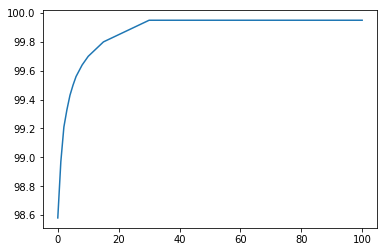

In [158]:
X = df_cleanned[['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']]
pca = PCA().fit(X)
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
plt.show()


In [164]:
pca = PCA(n_components=30)
pca.fit(X)
X_modified=pca.fit_transform(X)

<h4>Conclusion</h4>
We here idenifited
1. 29 Important features (using correlation i.e. 19 directly and 10 inversly correlated  
2. Using Chisq test we could observe stat and community doen't play a crucial role in explaining the variablity of ViolentCrimesPerPop
3. We also build a new features from PCA (uning 30 componets as 30 components explain the variablitiy of data).

<h3>Chapter-3. Project Task</h3>

**Task - I : Decision Tree**<br>
Decision tree learning uses a decision tree as a predictive model which maps observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). It is one of the predictive modelling approaches used in statistics, data mining and machine learning. Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. <br>
**Mathematical Intuition :** Algorithms for constructing decision trees usually work top-down, by choosing a variable at each step that best splits the set of items. To find that variable we calculagte Ingormation gain . To compute that we can use many measures but generally Gini-Index or entropy are used .<br>
First one is **Gini-Index** is defined as a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Gini impurity can be computed by the following formula (where i varies over all the classes) :-
<br>$$GINI-INDEX(E)=1-\sum_{i=1}^C \Pr(class=i)$$ where i varies over all the classes
<br>
<br>Second one is **Entropy** is defined as a measure of randomness and can be computed by the following formula(where i varies over all the classes) .:-
<br>$$Entropy(E)=-\sum_{i=1}^C \Pr(class=i)\log_2\Pr(class=i)$$

Based on above indexies **Information gain (IG) ** can be computes as follows :<br>
**Information Gain = Entropy(parent) - Weighted Sum of Entropy(Children)**
<br>or<br>

**Information Gain = GINI-INDEX(parent) - Weighted Sum of GINI-INDEX(Children)**

So feature with high information gain is choosen as the decison node and so on the decision is created.



**Truth Perectange** is defined as : $\dfrac{True Datapoints}{Total Number of Datapoints}$<br>
**Fasle Perectange** is defined as : $\dfrac{False Datapoints}{Total Number of Datapoints}$


In [57]:
TRUTH_CLENNED_PERCENTAGE= sum(df_cleanned['highCrime'])*100.0/len(df_cleanned)
FALSE_CLENNED_PERCENTAGE=  100.0-TRUTH_CLENNED_PERCENTAGE
print("1a.")
print("Truth Percentage is :",round(TRUTH_CLENNED_PERCENTAGE,3),"%")
print("False Percentage is :" ,round(FALSE_CLENNED_PERCENTAGE,3),"%")

1a.
Truth Percentage is : 62.72 %
False Percentage is : 37.28 %


**Confusion Matrix**<br>
A confusion matrix contains information about actual and predicted classifications done by a classification system. Performance of such systems is commonly evaluated using the data in the matrix. The following table shows the confusion matrix for a two class classifier.Following Image explain the true meaning of confusion matrix.<br>
<img src="http://rasbt.github.io/mlxtend/user_guide/evaluate/confusion_matrix_files/confusion_matrix_1.png"  height="200" width="200">
<br><center><b>Fig-1 "Confustion Matrix "</b></center>
<br>**Accuracy** <br>The accuracy is the proportion of the total number of predictions that were correct. It is determined using the equation :  $\dfrac{TP+FP}{TP+FP+TN+FN}$
<br>**Precision** <br>Tprecision (P) is the proportion of the predicted positive cases that were correct, as calculated using the equation : $\dfrac{TP}{TP+TN}$
<br>**Recall** <br>The recall or true positive rate (TP) is the proportion of positive cases that were correctly identified, as calculated using the equation: $\dfrac{TP}{TP+FP}$

In [61]:
clf = DecisionTreeClassifier(random_state=0)
X = df_cleanned[['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']]
Y = list(df_cleanned[['highCrime']].values.flatten())
clf = clf.fit(X,Y)
confusionmatrix = metrics.confusion_matrix(clf.predict(X) ,Y)
accuracy =metrics.accuracy_score(clf.predict(X) ,Y)
precision =metrics.precision_score(clf.predict(X) ,Y)
recall = metrics.precision_score(clf.predict(X) ,Y)
print("1b.(i)  Traindata and Testdata are same ")
print("\t\tConfusion Matrix")
print("\t\t\t\t|Predicted False","| Predicted True")
print("\t\t--------------------------------------------------|")
print("\t\t|Acutal Fasle\t|",confusionmatrix[0][0],"\t\t |\t",confusionmatrix[0][1])
print("\t\t|Actual True\t|",confusionmatrix[1][0],"\t\t |\t",confusionmatrix[1][1])
print("\t\t--------------------------------------------------|")
print("\t\ta. Accuracy : ",accuracy*100.0,"% ")
print("\t\tb. Precision : ",precision*100.0,"%")
print("\t\tc. Recall : ",recall*100.0,"%")

1b.(i)  Traindata and Testdata are same 
		Confusion Matrix
				|Predicted False | Predicted True
		--------------------------------------------------|
		|Acutal Fasle	| 743 		 |	 0
		|Actual True	| 0 		 |	 1250
		--------------------------------------------------|
		a. Accuracy :  100.0 % 
		b. Precision :  100.0 %
		c. Recall :  100.0 %


Since the the accuracy is 100% on the train data it means the algorithm is overfitting .


**Importance of Features**
Importance of features as defined by Sci-kit Learn library is based on gini importance and is computed as the (normalized) total reduction of the criterion brought by that feature.


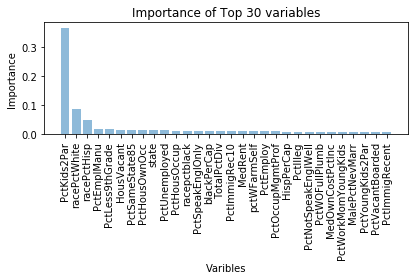

In [46]:
# %matplotlib notebook
importance_vlaues = pd.DataFrame({
 'importance':clf.feature_importances_
},index=list(X))


importance_vlaues =importance_vlaues.sort_values('importance',ascending=False).head(30)
 
objects = importance_vlaues.index
y_pos = np.arange(len(importance_vlaues['importance']))
performance = importance_vlaues['importance']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Importance')
plt.xlabel('Varibles')
plt.title('Importance of Top 30 variables')
plt.tight_layout()
plt.show()

**1b. (ii)**
<br>These are the 10 most important features in Decision Tree Classification.This calculation is based on Geni Index value of that feature and calculated as the (normalized) total reduction of the criterion brought by that feature. Here, **PctKids2Par** has the heighest Geni Index value and **PctImmigRecent** has lowest value. These features hepls to classifi the model efficiently to predict the highCrime. Description for each feature is given below:
<br>**PctKids2Par** : It is the percentage of  kids in the family housing  with two parents.
<br>This is the most important feature according to the implementatiom. Reason behind this may be children with two parents come from highly educated family, tends to low rate of crime.
<br>
<br>**racePctWhite** : It is the percentage of  population that is caucasian (i.e. european orgin - White Skinned)
<br>There is racial descrimination so, it tends to be the imporatant feature in detection crime rate.
<br>
<br>**racePctHisp** : It is the percentage of population that is of hispanic heritage(i.e broadly refers to the people who have historical link to spain.
<br> This is also gives us the description about race, hence it is imporatant.
<br>
<br>**PctEmplManu** : It is the percentage of people of age 16 and above who are employeed in manufacturing
<br>This gives us the inforamtion about employement and employments plays imporatant role in detecting crime rate, as unemployement provokes towards crime. Also, Employedd in manufaturing means people mostly involved in Labour work.
<br>
<br>**PctLess9thGrade** : It is the percentage of people of age 25 and above with less than 9th grade education
<br> This gives information about youth who are with less than 9th grade education. Less the education, more the chances of falling into crime world. Hence this is also an imporatant feature.
<br>
<br>**HousVacant** : It is the number of vacant(empty) housholdes
<br>This gives idea about empty location. This also one of imporatant feature as more or sometimes no crime happens in empty area.
<br>
<br>**PctSameState85** : It is the percentage of people living in the same State as in year 1985 (5 years before)
<br>This is the number of people who are living in same area for 5 years. So, these people are living there, they knows the condition there. Hence, This can also be an feature deciding Crime Rate.
<br>
<br>**PctHousOwnOcc** : It is the percentage of households owner occupied
<br>People will buy house in the safer area. Percentage of Households owner shows that there may be less crime. Hence it can be a deciding feature.
<br>
<br>**state** : US States
<br> Some states are famous for crime, so it can be a deciding factor in some amount.
<br>
<br>**PctUnemployed**: It is the percentage of people of age 16 and above who are in the labor force and unemployed.
<br>This gives information about unemployed people which is the most imporatant factor for crime, Hence this can be the factor.

**Cross Validation**

Cross validation is a model evaluation method that is better than residuals. The problem with residual evaluations is that they do not give an indication of how well the learner will do when it is asked to make new predictions for data it has not already seen. One way to overcome this problem is to not use the entire data set when training a learner. Some of the data is removed before training begins. Then when training is done, the data that was removed can be used to test the performance of the learned model on new data. This is the basic idea for a whole class of model evaluation methods called cross validation.

**K-fold **cross validation is one way to improve over the holdout method. The data set is divided into k subsets, and the holdout method is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. The advantage of this method is that it matters less how the data gets divided. Every data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. The variance of the resulting estimate is reduced as k is increased. The disadvantage of this method is that the training algorithm has to be rerun from scratch k times, which means it takes k times as much computation to make an evaluation. A variant of this method is to randomly divide the data into a test and training set k different times. The advantage of doing this is that you can independently choose how large each test set is and how many trials you average over. Image below gives a better view of k-fold cross validation
<img src="https://upload.wikimedia.org/wikipedia/commons/1/1c/K-fold_cross_validation_EN.jpg"  height="400" width="400"><br><b><center>Fig-2 Example of K=4 fold Cross Vadilation</b></center>

In [172]:
cv = KFold(X.shape[0], 10, shuffle=False)
cv_score_accuracy = cross_val_score(clf, X, Y,scoring='accuracy', cv=cv)
cv_score_precision = cross_val_score(clf, X, Y,scoring='precision', cv=cv)
cv_score_recall = cross_val_score(clf, X, Y,scoring='recall', cv=cv)
decisontrees_crossvalidationscores=  pd.DataFrame(
    {'CV Accuracy': cv_score_accuracy,
     'CV Precision': cv_score_precision,
     'CV Recall': cv_score_recall
    })
decisontrees_crossvalidationscores['Fold Number']=decisontrees_crossvalidationscores.index+1
print("1c.(i)")
display(decisontrees_crossvalidationscores)
decisontrees_crossvalidationscores.to_csv("decisontrees_crossvalidationscores.csv")
print("a. Avg. Accuracy : ",np.mean(cv_score_accuracy)*100.0,"% ")
print("b. Avg. Precision : ",np.mean(cv_score_precision)*100.0,"% ")
print("c. Avg. Recall : ",np.mean(cv_score_recall)*100.0,"% ")



/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

1c.(i)


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,CV Accuracy,CV Precision,CV Recall,Fold Number
0,0.785000,0.887417,0.830303,1
1,0.800000,0.877907,0.889535,2
2,0.760000,0.822222,0.805755,3
3,0.693467,0.748031,0.771654,4
4,0.643216,0.679245,0.647619,5
5,0.628141,0.567308,0.648352,6
6,0.733668,0.758333,0.778761,7
7,0.693467,0.653465,0.731183,8
8,0.758794,0.905109,0.810458,9
9,0.633166,0.546875,0.804348,10


a. Avg. Accuracy :  71.2891959799 % 
b. Avg. Precision :  74.4591405782 % 
c. Avg. Recall :  77.1796674906 % 



**1c. (ii) ** 
The accuracy of decison tree with same train and test data is 100% showing that decision tree it is **overfitting**.
Overfitting occurs when a statistical model or machine learning algorithm captures the noise of the data.  Intuitively, overfitting occurs when the model or the algorithm fits the "train data" too well.  Specifically, overfitting occurs if the model or algorithm shows low bias but high variance.
In cross validation, we are trained and test 9 folds and test on 1 fold respectively, hence results are different.


In [201]:
param_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 10, 20],
              "max_depth": [None, 2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_leaf_nodes": [None, 5, 10, 20],
              }

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt,
                               param_grid=param_grid,
                               cv=cv)

temp=grid_search.fit(X, Y)
# top_params = reportgrid_search.grid_scores_, 3)
print(temp)

GridSearchCV(cv=sklearn.cross_validation.KFold(n=1993, n_folds=10, shuffle=False, random_state=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20], 'max_depth': [None, 2, 5, 10], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [None, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


**Task - II : Linear Classification**<br>
The goal of statistical classification is to use an object's characteristics to identify which class (or group) it belongs to. A linear classifier achieves this by making a classification decision based on the value of a linear combination of the characteristics. An object's characteristics are also known as feature values and are typically presented to the machine in a vector called a feature vector. Such classifiers work well for practical problems such as document classification, and more generally for problems with many variables (features), reaching accuracy levels comparable to non-linear classifiers while taking less time to train and use.

**A. Gaussina Naive Bayes**<br>
It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature. For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

Bayes theorem provides a way of calculating posterior probability P(c|x) from P(c), P(x) and P(x|c). Look at the equation below:
 <br><center>
<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/09/Bayes_rule-300x172.png"  height="400" width="400"></center><br>
P(c|x) is the posterior probability of class (c, target) given predictor (x, attributes).
P(c) is the prior probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.


In [67]:
clf = GaussianNB()
X = df_cleanned[['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']]
Y = list(df_cleanned[['highCrime']].values.flatten())
clf = clf.fit(X,Y)
confusionmatrix = metrics.confusion_matrix(clf.predict(X) ,Y)
accuracy =metrics.accuracy_score(clf.predict(X) ,Y)
precision =metrics.precision_score(clf.predict(X) ,Y)
recall = metrics.precision_score(clf.predict(X) ,Y)
print("Traindata and Testdata are same ")
print("\t\tConfusion Matrix")
print("\t\t\t\t|Predicted False","| Predicted True")
print("\t\t--------------------------------------------------|")
print("\t\t|Acutal Fasle\t|",confusionmatrix[0][0],"\t\t |\t",confusionmatrix[0][1])
print("\t\t|Actual True\t|",confusionmatrix[1][0],"\t\t |\t",confusionmatrix[1][1])
print("\t\t--------------------------------------------------|")
print("\t\ta. Accuracy : ",accuracy*100.0,"% ")
print("\t\tb. Precision : ",precision*100.0,"%")
print("\t\tc. Recall : ",recall*100.0,"%")
cv = KFold(X.shape[0], 10, shuffle=False)
cv_score_accuracy = cross_val_score(clf, X, Y,scoring='accuracy', cv=cv)
cv_score_precision = cross_val_score(clf, X, Y,scoring='precision', cv=cv)
cv_score_recall = cross_val_score(clf, X, Y,scoring='recall', cv=cv)
decisontrees_crossvalidationscores=  pd.DataFrame(
    {'CV Accuracy': cv_score_accuracy,
     'CV Precision': cv_score_precision,
     'CV Recall': cv_score_recall
    })
decisontrees_crossvalidationscores['Fold Number']=decisontrees_crossvalidationscores.index+1
print("2a.(i)")
display(decisontrees_crossvalidationscores)
decisontrees_crossvalidationscores.to_csv("decisontrees_crossvalidationscores.csv")
print("a. Avg. Accuracy : ",np.mean(cv_score_accuracy)*100.0,"% ")
print("b. Avg. Precision : ",np.mean(cv_score_precision)*100.0,"% ")
print("c. Avg. Recall : ",np.mean(cv_score_recall)*100.0,"% ")


Traindata and Testdata are same 
		Confusion Matrix
				|Predicted False | Predicted True
		--------------------------------------------------|
		|Acutal Fasle	| 679 		 |	 382
		|Actual True	| 64 		 |	 868
		--------------------------------------------------|
		a. Accuracy :  77.6216758655 % 
		b. Precision :  69.44 %
		c. Recall :  69.44 %
2a.(i)


,CV Accuracy,CV Precision,CV Recall,Fold Number
0,0.780000,0.929078,0.793939,1
1,0.770000,0.963235,0.761628,2
2,0.825000,0.981481,0.762590,3
3,0.723618,0.918605,0.622047,4
4,0.653266,0.860000,0.409524,5
5,0.788945,0.855072,0.648352,6
6,0.839196,0.965517,0.743363,7
7,0.783920,0.878788,0.623656,8
8,0.773869,0.935484,0.758170,9
9,0.743719,0.725275,0.717391,10


a. Avg. Accuracy :  76.8153266332 % 
b. Avg. Precision :  90.1253562112 % 
c. Avg. Recall :  68.4065991577 % 


**Importance of Features ** <br> Importance of features is defined as :-<br><center>$\dfrac{|\mu_T-\mu_F|}{\sigma_T+\sigma_F}$</center>

2a.(ii)


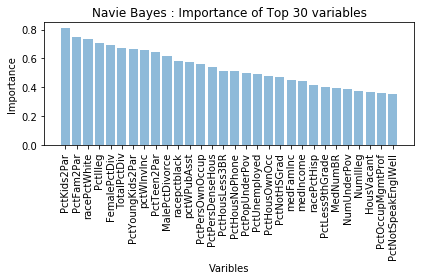

In [20]:
print("2a.(ii)")
importance=[]
for x in list(X):
    importance.append(abs(np.mean(df_cleanned[df_cleanned['highCrime']==1.0][x])-np.mean(df_cleanned[df_cleanned['highCrime']==0.0][x]))/abs(np.std(df_cleanned[df_cleanned['highCrime']==1.0][x])+np.std(df_cleanned[df_cleanned['highCrime']==0.0][x])))

importance_vlaues = pd.DataFrame({
 'importance':importance,
}, index=list(X))
importance_vlaues =importance_vlaues.sort_values('importance',ascending=False).head(30)
 
objects = importance_vlaues.index
y_pos = np.arange(len(importance_vlaues['importance']))
performance = importance_vlaues['importance']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Importance')
plt.xlabel('Varibles')
plt.title('Navie Bayes : Importance of Top 30 variables')
plt.tight_layout()
plt.show()

**PctKids2Par** : It is the percentage of kids in family housing with two parents.<br>
This is the most important feature according to the implementatiom. Reason behind this may be children with two parents come from highly educated family, tends to low rate of crime.  

**PctFam2Par** : It is the percentage of families (with kids) that are headed by two parents.<br>
This gives information about percentage of kids who headed by two parents. Culture is the important feature, when it comes to detecting crime. So, if kid has two parents they are well behaved. So, this can be an important feature.

**racePctWhite** : It is the percentage of population that is caucasian (i.e European origin - white-skinned).<br>
There is racial descrimination so, it tends to be the imporatant feature in detection crime rate. 

**PctIlleg** : It is the percentage of kids born to never married.<br>
Being single will play an important role in crime detection. Hence, this may be an important feature.

**FemalePctDiv** : It is the percentage of females who are divorced.<br>
Divorced and female combination leads to detecting Crime rate.


**2b.(iii) Comparision between Decision Tree and Naive Bayes**
1. Accuracy and Precision are more for Naive Bayes than Decision Tree. But, Recall is more for Decision Tree than Naive Bayes. Which means Type 2 error is more(i.e it's predicting false negative) in Naive Bayes.
2. In overall, more the accuracy, better the model.

**B. Linear SVC** <br>
“Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However,  it is mostly used in classification problems. In this algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiate the two classes very well . In Linear SVC the hyper plane we get is linear in nature. 

In [21]:
clf = LinearSVC()
X = df_cleanned[['state', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']]
Y = list(df_cleanned[['highCrime']].values.flatten())
clf = clf.fit(X,Y)
confusionmatrix = metrics.confusion_matrix(clf.predict(X) ,Y)
accuracy =metrics.accuracy_score(clf.predict(X) ,Y)
precision =metrics.precision_score(clf.predict(X) ,Y)
recall = metrics.precision_score(clf.predict(X) ,Y)
print("Traindata and Testdata are same ")
print("\t\tConfusion Matrix")
print("\t\t\t\t|Predicted False","| Predicted True")
print("\t\t--------------------------------------------------|")
print("\t\t|Acutal Fasle\t|",confusionmatrix[0][0],"\t\t |\t",confusionmatrix[0][1])
print("\t\t|Actual True\t|",confusionmatrix[1][0],"\t\t |\t",confusionmatrix[1][1])
print("\t\t--------------------------------------------------|")
print("\t\ta. Accuracy : ",accuracy*100.0,"% ")
print("\t\tb. Precision : ",precision*100.0,"%")
print("\t\tc. Recall : ",recall*100.0,"%")
cv = KFold(X.shape[0], 10, shuffle=False)
cv_score_accuracy = cross_val_score(clf, X, Y,scoring='accuracy', cv=cv)
cv_score_precision = cross_val_score(clf, X, Y,scoring='precision', cv=cv)
cv_score_recall = cross_val_score(clf, X, Y,scoring='recall', cv=cv)
decisontrees_crossvalidationscores=  pd.DataFrame(
    {'CV Accuracy': cv_score_accuracy,
     'CV Precision': cv_score_precision,
     'CV Recall': cv_score_recall
    })
decisontrees_crossvalidationscores['Fold Number']=decisontrees_crossvalidationscores.index+1
print("2b.(i)")
display(decisontrees_crossvalidationscores)
decisontrees_crossvalidationscores.to_csv("decisontrees_crossvalidationscores.csv")
print("a. Avg. Accuracy : ",np.mean(cv_score_accuracy)*100.0,"% ")
print("b. Avg. Precision : ",np.mean(cv_score_precision)*100.0,"% ")
print("c. Avg. Recall : ",np.mean(cv_score_recall)*100.0,"% ")




Traindata and Testdata are same 
		Confusion Matrix
				|Predicted False | Predicted True
		--------------------------------------------------|
		|Acutal Fasle	| 360 		 |	 46
		|Actual True	| 383 		 |	 1204
		--------------------------------------------------|
		a. Accuracy :  78.4746613146 % 
		b. Precision :  96.32 %
		c. Recall :  96.32 %
2b.(i)


,CV Accuracy,CV Precision,CV Recall,Fold Number
0,0.860000,0.877778,0.963636,1
1,0.890000,0.897849,0.970930,2
2,0.885000,0.938931,0.848921,3
3,0.738693,0.903226,0.692913,4
4,0.688442,0.815217,0.619048,5
5,0.798995,0.742574,0.978022,6
6,0.874372,0.801527,1.000000,7
7,0.798995,0.846154,0.849462,8
8,0.844221,0.772727,0.960784,9
9,0.824121,0.680328,0.978261,10


a. Avg. Accuracy :  82.0283919598 % 
b. Avg. Precision :  82.7631169833 % 
c. Avg. Recall :  88.6197799128 % 


**Importance of Features **
Importance of features can be measured by the absolute feature weights in the model.<br> <center>$Importance(Feature_i)=|Weight_i|$</center>

2b(ii)


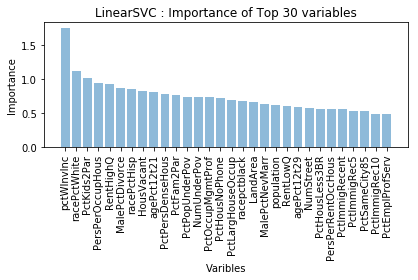

In [22]:
print("2b(ii)")
importance = clf.coef_[0]

importance_vlaues = pd.DataFrame({
 'importance':importance,
}, index=list(X))

importance_vlaues['importance'] = abs(importance_vlaues['importance'])
importance_vlaues =importance_vlaues.sort_values('importance',ascending=False).head(30)
 
objects = importance_vlaues.index
y_pos = np.arange(len(importance_vlaues['importance']))
performance = importance_vlaues['importance']
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=90)
plt.ylabel('Importance')
plt.xlabel('Varibles')
plt.title('LinearSVC : Importance of Top 30 variables')
plt.tight_layout()
plt.show()


<br>**pctWInvInc** : It is the percentage of households with investment / rent income in 1989.
<br> This provides information about investments, rent, etc. It can say that if people are paying the money, most likely it will help in detecting the crime rate. Hence It may be an imporatnt feature.

<br>**racePctWhite** : It is the percentage of population that is caucasian (i.e European origin - white-skinned).
<br>There is racial descrimination so, it tends to be the imporatant feature in detection crime rate.

<br>**PctKids2Par** : It is the percentage of kids in family housing with two parents.
<br>This is the most important feature according to the implementatiom. Reason behind this may be children with two parents come from highly educated family, tends to low rate of crime.

<br>**PersPerOccupHous** : It is a mean persons per household.
<br>This provides the information about number of people per house, this is the critical point when it considr to detect high crime. There is a certain rules for maximum number of people per house and it is illigal exceed that limit. SO, this will be imporatant feature for detection.

<br>**RentHighQ** : It is a rental housing - upper quartile rent.
<br> This gives information about upper quartile rent. If people are paying rent then either they are employed or they are more towords crime. Hence, it can be plays an important role in the crime detection.

**2b(iii) Comparision between Decision Tree and Naive Bayes and Linear SVC**
1. All the three Accuracy and Recall is more for Linear SVC as compare to other two models.
2. For Linear SVC, precision is more than Decision Tree  and less than Naive Bayes. This means False positive detection is more than Decision Tree and Less than Naive Bayes. But the difference between Naive Bayes and Linear SVC is not much.
3. Hence, Approximately Linear SVC is better as compare to others.

**Task - III : Linear Regression**<br>

In statistics, linear regression is an approach for modeling the relationship between a scalar dependent variable y and one or more explanatory variables (or independent variables) denoted X by fitting a linear equation to observed data.
Look at the equation below:
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0c3243c8f62b9416119fd46c2b9eb0e70e40037b"  height="500" width="500"></center><br>
where T denotes the transpose, so that xiTβ is the inner product between vectors xi and β.
Often these n equations are stacked together and written in vector form as
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e"  height="90" width="90"></center><br>
Where X is the explanatory variable and Y is the dependent variable. The slope of the line is β, and a is the intercept (the value of y when x = 0).<br>
**A. Linear Regression**

In [3]:
X = df_cleanned[['state', 'fold', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']]
Y = df_cleanned[['ViolentCrimesPerPop']].values.flatten()
lr = linear_model.LinearRegression()
lr.fit(X,Y)
predicted = lr.predict(X)
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X, Y, scoring='neg_mean_squared_error', cv=cross_validation.LeaveOneOut(10))
print("3a.(i) Cross Validation 10 Fold")
print(scores)
print(np.mean(scores))
print('3a.(ii)')
print(mean_squared_error(predicted,Y))
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


NameError: name 'df_cleanned' is not defined

**3a(iii)**To identify the useful features from regression we can use the following equateion :-
<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/8119b3ed1259aa8ff15166488548104b50a0f92e"  height="100" width="100"></center><br>
where we can se $\beta$ (cofficient) affects the target variable . So if this coffieicent is high it means it contribute more to the target . If it is positive it means it contributes to high value of target whereas if it is negative it reduce the value of target.

In [2]:


HighFeatures = pd.DataFrame({'Coffiecitent':lr.coef_,'Variable':list(X)}).sort('Coffiecitent', ascending=False).head(10)
y_pos = np.arange(len(HighFeatures['Coffiecitent']))
performance = HighFeatures['Coffiecitent']
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, HighFeatures['Variable'],rotation=90)
plt.ylabel('Importance')
plt.xlabel('Varibles')
plt.title('Linear Regression : Importance of Top 10 variables for High Crime')
plt.tight_layout()
plt.show()
LowFeatures=pd.DataFrame({'Coffiecitent':lr.coef_,'Variable':list(X)}).sort('Coffiecitent', ascending=True).head(10)
y_pos = np.arange(len(LowFeatures['Coffiecitent']))
performance = abs(LowFeatures['Coffiecitent'])
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, LowFeatures['Variable'],rotation=90)
plt.ylabel('Importance')
plt.xlabel('Varibles')
plt.title('Linear Regression : Importance of Top 10 variables for Low Crime')
plt.tight_layout()
plt.show()

NameError: name 'lr' is not defined

**B. Linear Regression :Ridge Regression **<br>

Sometimes, with many predictors, fitting the full model without penalization will result in large prediction intervals, and Linear regression estimator may not uniquely exist.
Ridge regression is like least squares but shrinks the estimated
coefficients towards zero. Given a response vector y ∈ R^n and a predictor matrix X ∈ R^(n*p), the ridge regression coefficients are defined as
<br><center>
<img src="http://businessforecastblog.com/wp-content/uploads/2014/05/LASSOobkf.png"  height="400" width="400"></center><br>
Here λ ≥ 0 is a tuning parameter, which controls the strength of the penalty term. Note that:
<br>When λ = 0, we get the linear regression estimate
<br>When λ = ∞, we get β^ridge = 0
<br>For λ in between, we are balancing two ideas: fitting a linear model of y on X, and shrinking the coefficients

In [24]:
score =cross_val_score(linear_model.RidgeCV(alphas=(10, 1, 0.1, 0.01,0.001)), X, Y, scoring='neg_mean_squared_error',cv=cross_validation.LeaveOneOut(10))
ridge = linear_model.RidgeCV(alphas=(10, 1, 0.1, 0.01,0.001))
ridge.fit(X,Y)
predicted = ridge.predict(X)
print("3b.(i)Cross Validation Score")
print(scores)
print(np.mean(scores))
print('3b.(ii) MSE on Same full cleaned dataset')
print(mean_squared_error(predicted,Y))
# fig, ax = plt.subplots()
# ax.scatter(Y, predicted)
# ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
print('3b.(iii) Best Alpha')
print(ridge.alpha_)


3b.(i)Cross Validation Score
[-0.00044885 -0.01449234 -0.04172163 -0.01146998 -0.09724224 -0.00058036
 -0.00189955 -0.14029149 -0.00060561 -0.01420245]
-0.0322954492774
3b.(ii) MSE on Same full cleaned dataset
0.0166533412034
3b.(iii) Best Alpha
1.0


**3b(iv) Analysis of Alpha**
1. In the above equation of Ridge Regression, alpha is same as lambda. More the value of alpha, more the model was overfitt.
2. We got alpha = 1, This shows that our model was overfil to some extent and we solved it using this alpha value.
3. Resultanat alpha value is most of the value from the set (10, 1, 0.1, 0.01 and 0.001), but it is not largest. Hence wecan say that over model was little overfit.


**C. Linear Regression : Polynomial **<br>
Polynomial Regression algorithm

This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.
For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:
<br><center>
<img src="http://scikit-learn.org/stable/_images/math/3666ec3bc883af433b318bff9143b5166bcaef15.png"  height="250" width="250"></center><br>
If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:
<br><center>
<img src="http://scikit-learn.org/stable/_images/math/1e1f74179df321954b823943c08d555a524e69f9.png"  height="500" width="500"></center><br>
New variable:
<br><center>
<img src="http://scikit-learn.org/stable/_images/math/2c0a9947255ef61995c3f5e6319fc7fdfa3503c6.png"  height="250" width="250"></center><br>
With this re-labeling of the data, our problem can be written
<br><center>
<img src="http://scikit-learn.org/stable/_images/math/618623438e33ecf053d364a0b938f056cd758b34.png"  height="500" width="500"></center><br>
We see that the resulting polynomial regression is in the same class of linear models as above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.


In [25]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X=poly.fit_transform(X)
regr = linear_model.LinearRegression()
scores = cross_val_score(regr, X, Y, scoring='neg_mean_squared_error', cv=cross_validation.LeaveOneOut(10))
print("3c.(i) Cross Validation 10 Fold")
print(scores)
print(np.mean(scores))
print('3c.(ii)')
print(mean_squared_error(predicted,Y))

3c.(i) Cross Validation 10 Fold
[ -1.76452930e-02  -8.50242477e-06  -7.68647584e-02  -6.39287664e-03
  -8.88446589e-02  -5.47572857e-02  -3.82977663e-02  -1.96293505e-01
  -8.11012237e-03  -2.69380073e-03]
-0.0489908569209
3c.(ii)
0.0166533412034


**3c. (iii)**
<br> For quadratic model Root Mean Square value is 0.0480 and for Linear model, it is 0.0322. This shows that Root Mean Square value is increasing in Quadratic model.
<br> The Quadratic model is not giving any significant results.

**Task-IV Dirty Data**<br>
For cleaning the data we first removed all those colunm which has more the 80% of Nan and based on the distribustion of each feature we choose the process of imputation .If 



Source :<br>
1) http://dl.acm.org/citation.cfm?id=1325890<br>
2) http://www.dbis.informatik.hu-berlin.de/fileadmin/research/papers/techreports/2003-hub_ib_164-mueller.pdf


In [242]:
# Loading the unclean data file
raw = pd.read_csv("~/Desktop/ml_project/data/communities-crime-clean.csv")
df_uncleanned = pd.read_csv("~/Desktop/ml_project/data/communities-crime-full.csv").replace("?",np.nan)
for x in list(raw):
    df_uncleanned[x] = df_uncleanned[x].astype(raw[x].dtypes)
Y_cleanned = np.where(df_uncleanned['ViolentCrimesPerPop'] > 0.1, 1.0, 0.0)
aftercleanning = np.where(df_uncleanned['ViolentCrimesPerPop'] > 0.15, 1.0, 0.0)


df_uncleanned = df_uncleanned.drop(['state','communityname','fold','ViolentCrimesPerPop','county','community'], 1)
NAN_count = pd.DataFrame({"Percentage Of NAN":100-df_uncleanned.count()*100/len(df_uncleanned),"variable":df_uncleanned.count().index})
variables_with_80_NAN =list(NAN_count[NAN_count['Percentage Of NAN']>50]['variable'])
variables_left=list(set(list(df_uncleanned))-set(variables_with_80_NAN))
df_uncleanned= df_uncleanned[variables_left]
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
X_cleanned=imp.fit_transform(df_uncleanned)


# # #Decision Tree 
clf = DecisionTreeClassifier()
X = df_cleanned[['population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LandArea', 'PopDens', 'PctUsePubTrans', 'LemasPctOfficDrugUn']] 
Y = df_cleanned[['highCrime']].values.flatten()
cv = KFold(X.shape[0], 10, shuffle=False, random_state=33)
cv_score_accuracy = cross_val_score(clf, X, Y,scoring='accuracy', cv=cv)
cv_score_precision = cross_val_score(clf, X, Y,scoring='precision', cv=cv)
cv_score_recall = cross_val_score(clf, X, Y,scoring='recall', cv=cv)
print("Resutl For Cleaned Data")
print(np.mean(cv_score_accuracy))
print(np.mean(cv_score_precision))
print(np.mean(cv_score_recall))
cv_score_accuracy = cross_val_score(clf, X_cleanned, Y_cleanned,scoring='accuracy', cv=cv)
cv_score_precision = cross_val_score(clf, X_cleanned, Y_cleanned,scoring='precision', cv=cv)
cv_score_recall = cross_val_score(clf, X_cleanned, Y_cleanned,scoring='recall', cv=cv)
print("Result for Uncleanned Data after Cleanning")
print(np.mean(cv_score_accuracy))
print(np.mean(cv_score_precision))
print(np.mean(cv_score_recall))



Resutl For Cleaned Data
0.750532663317
0.792485125042
0.791565986172
Result for Uncleanned Data after Cleanning
0.771150753769
0.813487804808
0.806014161166


**4a. Comparision between Full(Non clean) and Clean Dataset**
1. From the above results, it shows that Accuracy, Precision and Recall for Uncleaanned dataset(Full-Non Cleaned) are more than that for Cleaned dataset.
2. To clean dataset, we removed all the entries which having more than 80% "NaN"/"?" values and replace the values with the corresponding Mean value for those entries which having less than 80% missing values.
3. Results shows that, applied cleaning strategies are good that we apply on Full(Non Clean) dataset.

**Task-V Team**<br>



** A. <br>Random Forest **<br>
Random Forest Algorithm

Random Forest grows Classification Tree. Each Tree follow below steps:
1. If the number of cases in the training set is N, sample N cases at random with replacement from the original data. This sample will be the training set for growing the tree.
2. If there are M input variables, a number m*M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
3. Each tree is grown to the largest extent possible. There is no pruning.
<br>
<br>**Logistic Regression**<br>

Random Forest grows Classification Tree. Each Tree follow below steps:
1. If the number of cases in the training set is N, sample N cases at random with replacement from the original data. This sample will be the training set for growing the tree.
2. If there are M input variables, a number m*M is specified such that at each node, m variables are selected at random out of the M and the best split on these m is used to split the node. The value of m is held constant during the forest growing.
3. Each tree is grown to the largest extent possible. There is no pruning.



In [253]:
print("5a.(i)")
names = ["LogisticRegression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]
from sklearn.svm import SVC
classifiers = [
    
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    ]
result_clean =[]
result_unclean =[]
print("Cleaned Data Set")
cv = KFold(X.shape[0], 10, shuffle=False, random_state=33)
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X, Y,scoring='accuracy', cv=cv)
        print(name,"Accuracy : ",np.mean(cv_score_accuracy))
        result_clean.append(np.mean(cv_score_accuracy))
print("Full Data Set")
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X_cleanned, Y_cleanned,scoring='accuracy', cv=cv)
        print(name,"Accuracy : ",np.mean(cv_score_accuracy))
        result_unclean.append(np.mean(cv_score_accuracy))

5a.(i)
Cleened Data Set
LogisticRegression Accuracy :  0.829814070352
Linear SVM Accuracy :  0.826286432161
RBF SVM Accuracy :  0.72183919598
Decision Tree Accuracy :  0.766103015075
Random Forest Accuracy :  0.80374120603
AdaBoost Accuracy :  0.798190954774
Naive Bayes Accuracy :  0.767653266332
Full Data Set
LogisticRegression Accuracy :  0.836924623116
Linear SVM Accuracy :  0.828896984925
RBF SVM Accuracy :  0.769180904523
Decision Tree Accuracy :  0.760130653266
Random Forest Accuracy :  0.811311557789
AdaBoost Accuracy :  0.814831658291
Naive Bayes Accuracy :  0.778195979899


In [ ]:
print("5a.(ii) Comparison")

bar_width = 0.15

index = np.arange(len(result_unclean))
opacity = 0.6
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, result_clean, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Cleaned')

rects2 = plt.bar(index + bar_width, result_unclean, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Full')

plt.xlabel('Dataset Used')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracries For two Datasets(Clean and Full)')
plt.xticks(index + bar_width / 3, names,rotation=50)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion :**It can be observed from the above bar graph that on full data which is prepared after cleanning all the algorithms perform better than their corresponding run on the cleanned data. Secondly we can observe Logistic Regression comes out to be the best algorithm to classify the data points as high or low crime zones.

**5a.(iii) Most Predictive Features for High Crime**
<br>Based on coorelation of all the variables with 'ViolentCrimesPerPop' following variables showed us high/medium coorelation coeeficient(> 0.4):- 'racepctblack', 'pctWPubAsst', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'MalePctDivorce', 'FemalePctDiv', 'TotalPctDiv', 'NumIlleg', 'PctIlleg', 'PctPersDenseHous', 'PctHousLess3BR', 'HousVacant', 'PctVacantBoarded', 'PctHousNoPhone'

<br>Based on Linear Regression 'PctHousOwnOcc', 'PersPerOccupHous', 'MalePctDivorce', 'PctRecImmig8', 'MedRent', 'medFamInc', 'OwnOccMedVal', 'PctEmploy', 'MalePctNevMarr', 'PctPersDenseHous', 'racepctblack', 'NumStreet', 'population', 'HousVacant', 'FemalePctDiv', 'NumInShelters', 'PctOccupMgmtProf', 'PctIlleg', 'NumUnderPov', 'agePct12t21', 'PctForeignBorn', 'perCapInc', 'PctHousLess3BR', 'pctWSocSec', 'PctOccupManu', 'racePctHisp', 'PctWorkMomYoungKids', 'PctVacantBoarded', 'PctLargHouseFam', 'PctBSorMore' these are the important features.

<br> **'PctIlleg', 'PctPersDenseHous', 'PctVacantBoarded', 'FemalePctDiv', 'PctHousLess3BR', 'HousVacant', 'racepctblack', 'NumUnderPov', 'MalePctDivorce'** these are the important features which commonly affect high crime rate. Following are the reasons behind each feature mention above:
<br>**PctIlleg:** This fields gives information about people who never married. Being Single is leads to depreesion and which result into entering a crime world. Hence we can say that this is high crime feature.

<br>**PctPersDenseHous:** This gives the information about number of people living illigally. People who are living illigal tends to do illigal jobs, results into high crime.

<br>**PctVacantBoarded:** This provide information about the emplty houses that is borded by someone. It is an illigal activity. So, this making sense that it will give high crime rate.

<br>**FemalePctDiv:** This gives the number of female who are divorced. So this leads to being single which is same as 'PctIlleg"

<br>**PctHousLess3BR:** This gives the percentage of houses which have less than 3 bedroom, this means people can not afford to buy big houses. This means unemployment which leads to crime.

<br>**HousVacant:** This will tell the percentage of vacant houses. Vacant area leads to less security which increases crime rate.

<br>**racepctblack:** This will give percentage of african american population. Lincon give Freedom to these people in 1863, so white people restricted theose people from many of the resources like education. This result into thease people move towards more crime. 

<br>**NumUnderPov:** This will give the information about people below poverty level. Below poverty level means people are unemployeed or they don't have sufficient money for leaving. This result into more crime rate.

<br>**MalePctDivorce:**This gives the number of male who are divorced. So this leads to being single which is same as 'PctIlleg"

**B. Finding A New Threshold**
After observing the distibustion of ViolentCrimesPerPop , we choose median as the "useful" thresold as the distrubtion is skewed towards left.

Distribustion Plot of ViolentCrimesPerPop


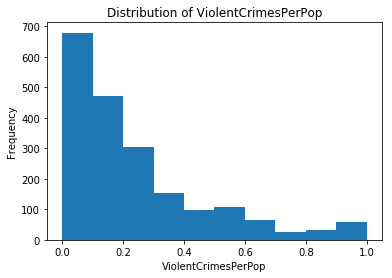

Median of ViolentCrimesPerPop: 0.15


In [237]:
print("5b.(ii)")
print("Distribustion Plot of ViolentCrimesPerPop")
plt.hist(df_cleanned['ViolentCrimesPerPop'])
plt.title("Distribution of ViolentCrimesPerPop")
plt.xlabel("ViolentCrimesPerPop")
plt.ylabel("Frequency")
plt.show()
print("Median of ViolentCrimesPerPop:",np.median(df_cleanned['ViolentCrimesPerPop']))

**5b.(iii)  Comparison Using New Threshold**

In [ ]:
print("5b.(iii)  CV Using New Threshold")
names = ["LogisticRegression", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "AdaBoost",
         "Naive Bayes"]

from sklearn.svm import SVC
classifiers = [
    
    LogisticRegression(),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()
    ]
threshold_new_clean=[]
threshold_new_full=[]


cv = KFold(X.shape[0], 10, shuffle=False, random_state=33)
print("Cleaned Data Set")
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X, np.where(df_cleanned['ViolentCrimesPerPop'] > 0.15, 1.0, 0.0),scoring='accuracy', cv=cv)
        print(name,"Accuracy :",np.mean(cv_score_accuracy))
        threshold_new_clean.append(np.mean(cv_score_accuracy))
print("Full Data Set")
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X_cleanned, aftercleanning,scoring='accuracy', cv=cv)
        print(name,"Accuracy :",np.mean(cv_score_accuracy))
        threshold_new_full.append(np.mean(cv_score_accuracy))


In [ ]:
print("5b.(iv) Comparision")
rects1 = plt.bar(index, result_clean, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Threshold=0.1')

rects2 = plt.bar(index + bar_width, threshold_new_clean, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Threshold=0.15')

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracries For Clean Data (Different Threshold)')
plt.xticks(index + bar_width / 3, names,rotation=50)
plt.legend()
plt.tight_layout()
plt.show()


rects1 = plt.bar(index, result_unclean, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Full')

rects2 = plt.bar(index + bar_width, threshold_new_full, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Full_NewThreshold')

plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracries For Full Data (Different Threshold)')
plt.xticks(index + bar_width / 3, names,rotation=50)
plt.legend()
plt.tight_layout()
plt.show()

**Conclusion**<br>
1. Based on the above graphs we can observe that changing the thresolid from 0.1 to median 0.15 is better for full data as full data with new thresohold out performed all the corresponding algorithms .
2. For Clean data the changing of threshold made logistic and LinearSVC perform equally whereas RBF SVM performs pooperly.

**Task-6***

**B. KNN Classification**<br>

K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure.Whenever Whenever we have a new point to classify, we find its K nearest neighbors from the training data. The distance is calculated using one of measures i.e Euclidean Distance, Minkowski Distance, Mahalanobis Distance

Algorithm:
1. For each training example pair x,f(x), add the example to the list of training examples.
2. Given a query instance xq to be classified, let x1,x2,...,xk denotes the k instances from training examples that are neareast to xq.
3. Return to class that represent the maximum of the k instances.

** AdaBoost **<br>

AdaBoost Algorithm
At each iteration, choose the classifier k which minimizes the total weighted error
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b9e7cfc4e97541226a30366155aaa314442407a2"  height="100" width="100"></center><br> 
use this to calculate the error rate
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/3038afd7e0d7886ca7a09ea30da90b172a3f2a9b"  height="200" width="200"></center><br> 
use this to calculate the weight 
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b9e7cfc4e97541226a30366155aaa314442407a2"  height="100" width="100"></center><br> 
and finally use this to improve the boosted classifier
<br><center>
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1b91c8f8a506f0742bd303f0b4b26e7d941b0212"  height="200" width="200"></center><br>
dataset {(x1,y1),...,(xN,yN)} Where, xi has an associated class yi ϵ {-1,1} 

and a set of weak classifiers {k1,...,kL} Where, kj(xi) ϵ {-1,1}

In [ ]:
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
   ]


cv = KFold(X.shape[0], 10, shuffle=False, random_state=33)
print("Cleened Data Set")
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X, Y, 1.0, 0.0),scoring='accuracy', cv=cv)
        print(name,"Accuracy :",np.mean(cv_score_accuracy))
print("Full Data Set")
for name, clf in zip(names, classifiers):
        cv_score_accuracy = cross_val_score(clf, X_cleanned, ,scoring='accuracy', cv=cv)
        print(name,"Accuracy :",np.mean(cv_score_accuracy))

